In [2]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

In [43]:
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D  # noqa
from matplotlib.colors import hsv_to_rgb

In [ ]:
from sklearn.decomposition import PCA

In [5]:
images_paths = glob.glob("../images/input/*")
images_paths[:3]

['../images/input\\1.jpeg',
 '../images/input\\RPf_00120_mesh.png',
 '../images/input\\RPf_00121_mesh.png']

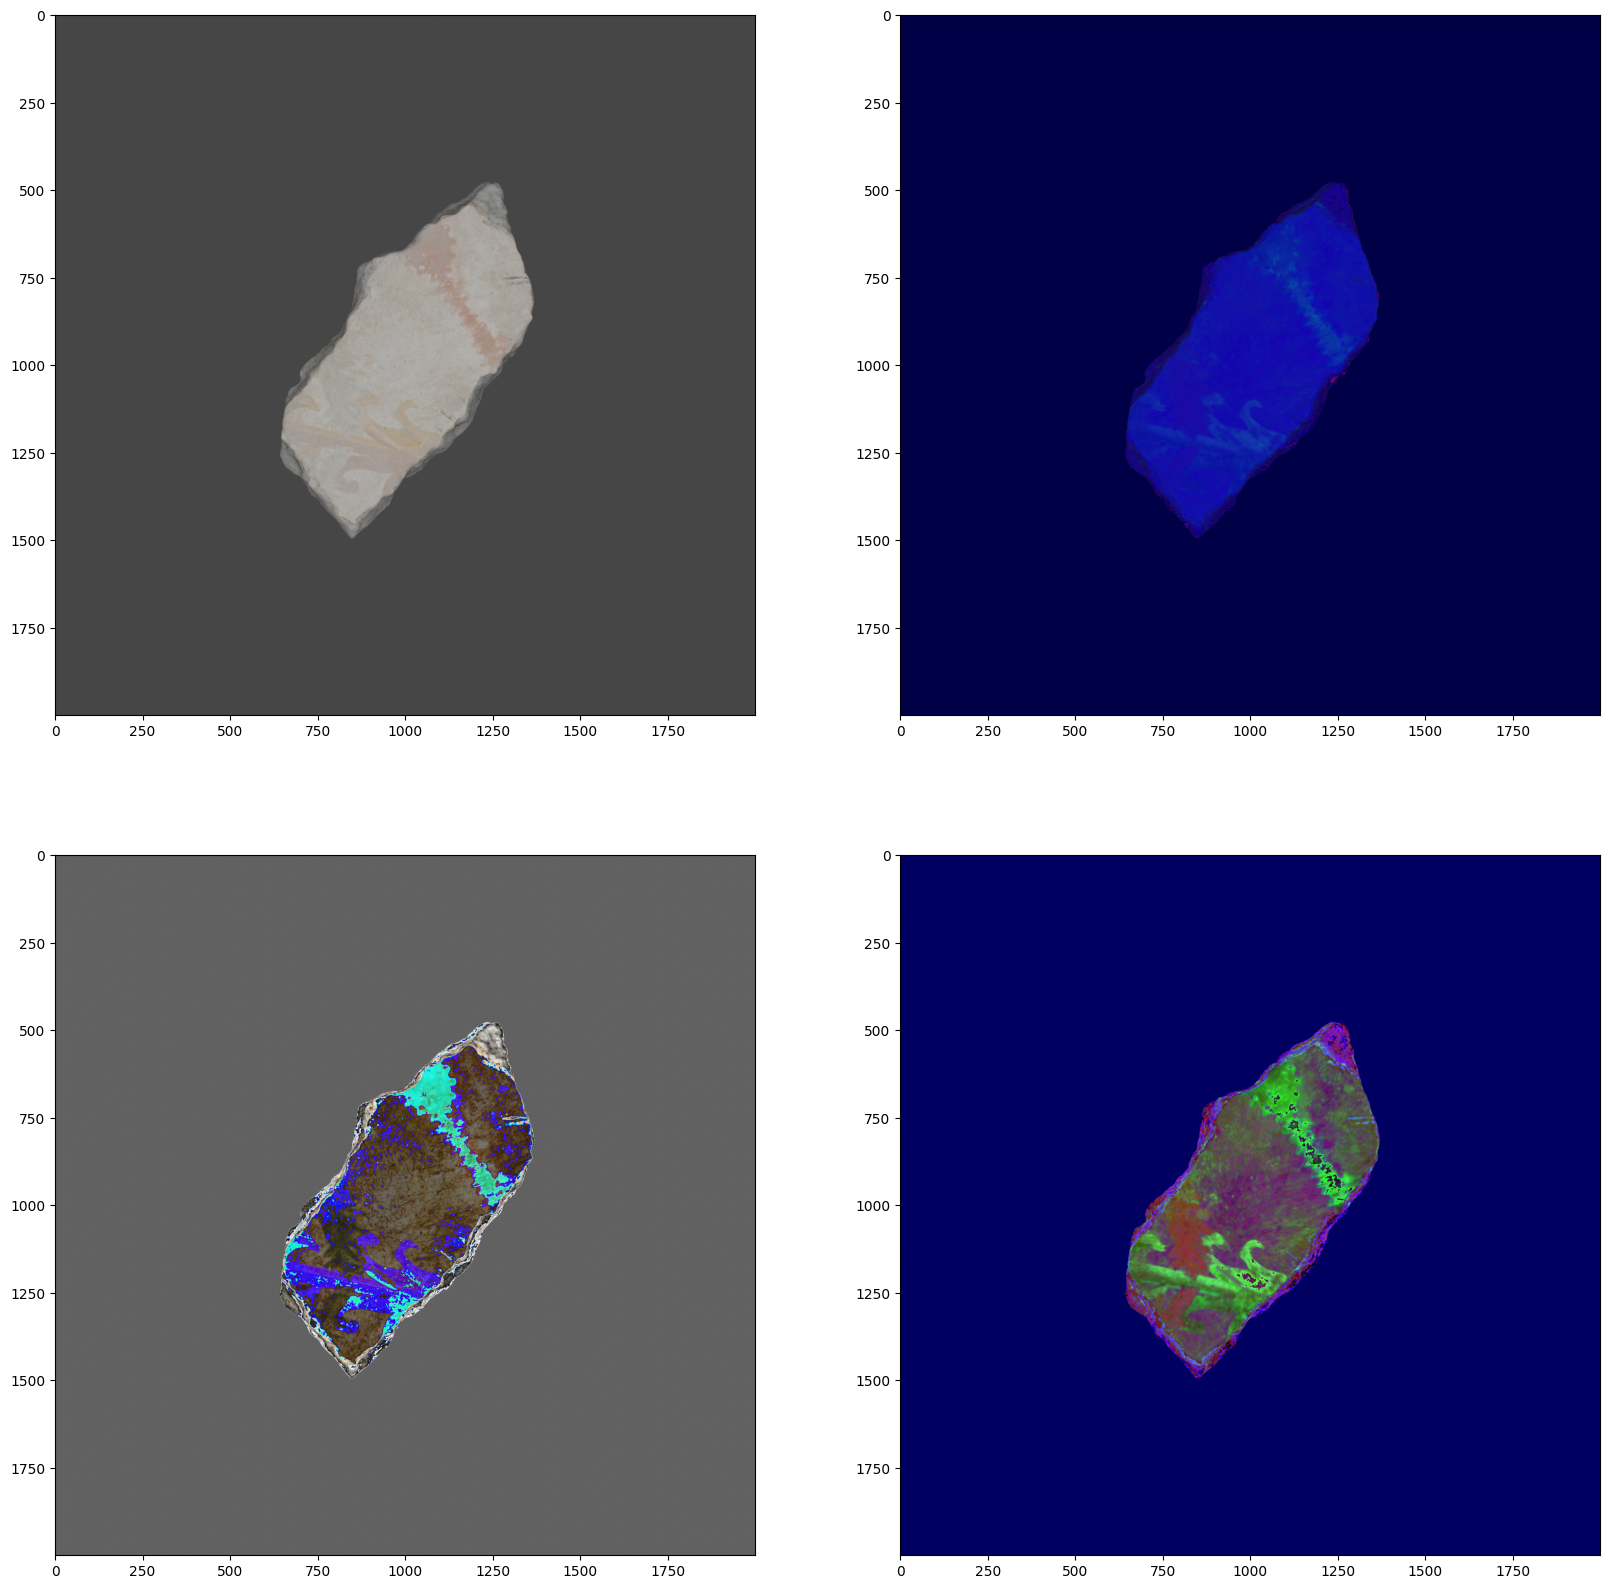

In [14]:
img = cv2.imread(images_paths[1])
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
fig,axes = plt.subplots(2,2,figsize=(20,20))
mult = 5
axes[0,0].imshow(img_rgb)
axes[0,1].imshow(img_hsv)
axes[1,0].imshow(img_rgb*mult)
axes[1,1].imshow(img_hsv*mult)

#ax = plt.subplot()
#ax.imshow(img_rgb)
#plt.imshow(img)
#plt.imshow(img_hsv)

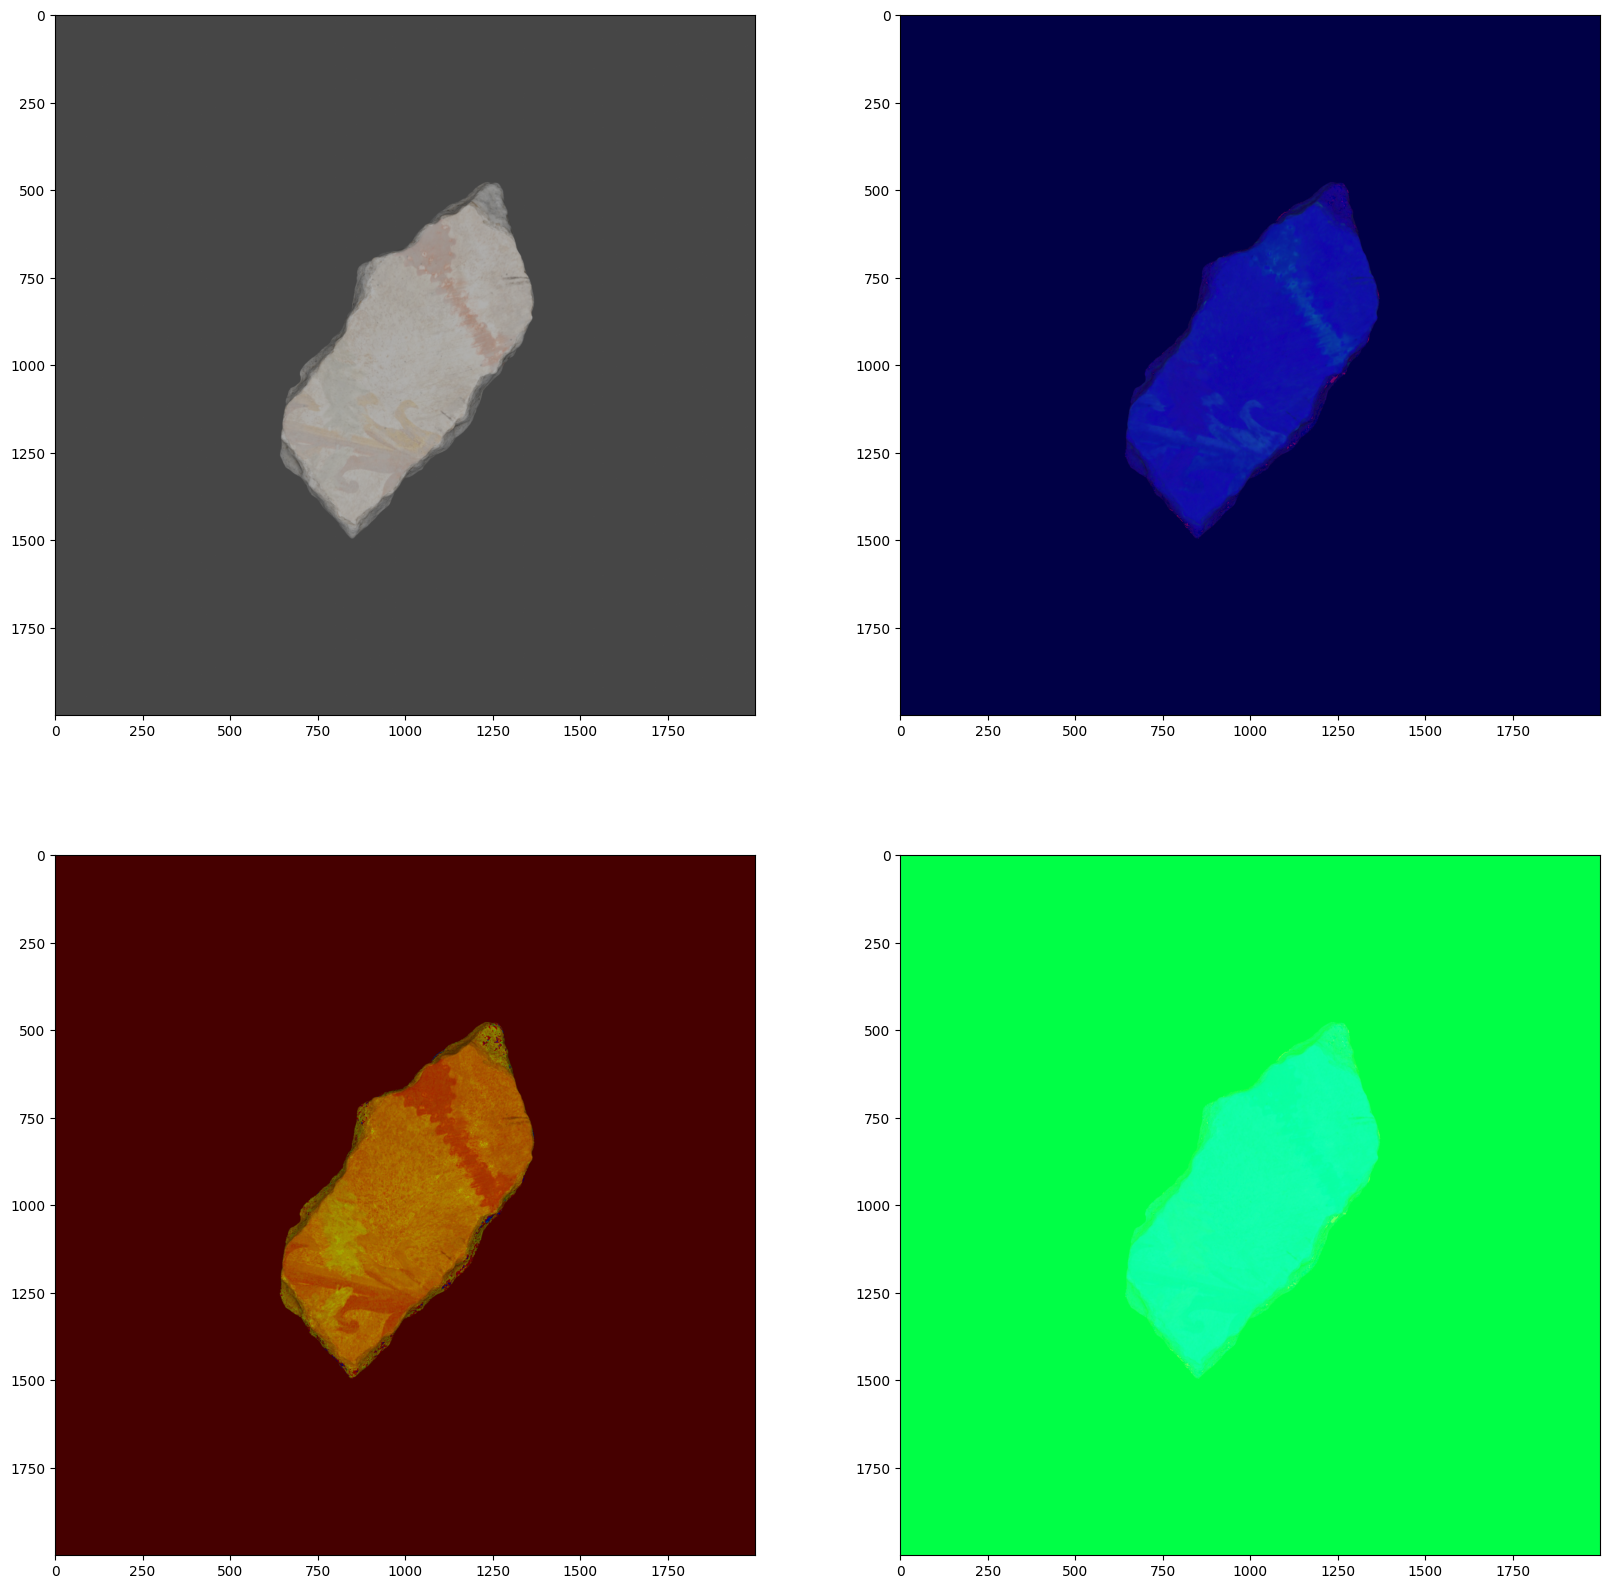

In [26]:
intensed_img_hsv = img_hsv.copy()
#satu_comp = intensed_img_hsv[:1:] *100
intensed_img_hsv[:,:,1] = 255


fig,axes = plt.subplots(2,2,figsize=(20,20))
axes[0,0].imshow(img_rgb)
axes[0,1].imshow(img_hsv)
axes[1,0].imshow(cv2.cvtColor(intensed_img_hsv,cv2.COLOR_HSV2RGB))
axes[1,1].imshow(intensed_img_hsv)

In [27]:
intensed_img_hsv

array([[[  0, 255,  70],
        [  0, 255,  71],
        [  0, 255,  71],
        ...,
        [  0, 255,  71],
        [  0, 255,  71],
        [  0, 255,  71]],

       [[  0, 255,  70],
        [  0, 255,  71],
        [  0, 255,  71],
        ...,
        [  0, 255,  70],
        [  0, 255,  71],
        [  0, 255,  71]],

       [[  0, 255,  70],
        [  0, 255,  71],
        [  0, 255,  71],
        ...,
        [  0, 255,  71],
        [  0, 255,  71],
        [  0, 255,  71]],

       ...,

       [[  0, 255,  71],
        [  0, 255,  70],
        [  0, 255,  71],
        ...,
        [  0, 255,  71],
        [  0, 255,  71],
        [  0, 255,  71]],

       [[  0, 255,  71],
        [  0, 255,  71],
        [  0, 255,  70],
        ...,
        [  0, 255,  70],
        [  0, 255,  70],
        [  0, 255,  71]],

       [[  0, 255,  70],
        [  0, 255,  71],
        [  0, 255,  71],
        ...,
        [  0, 255,  70],
        [  0, 255,  71],
        [  0, 255,  71]]

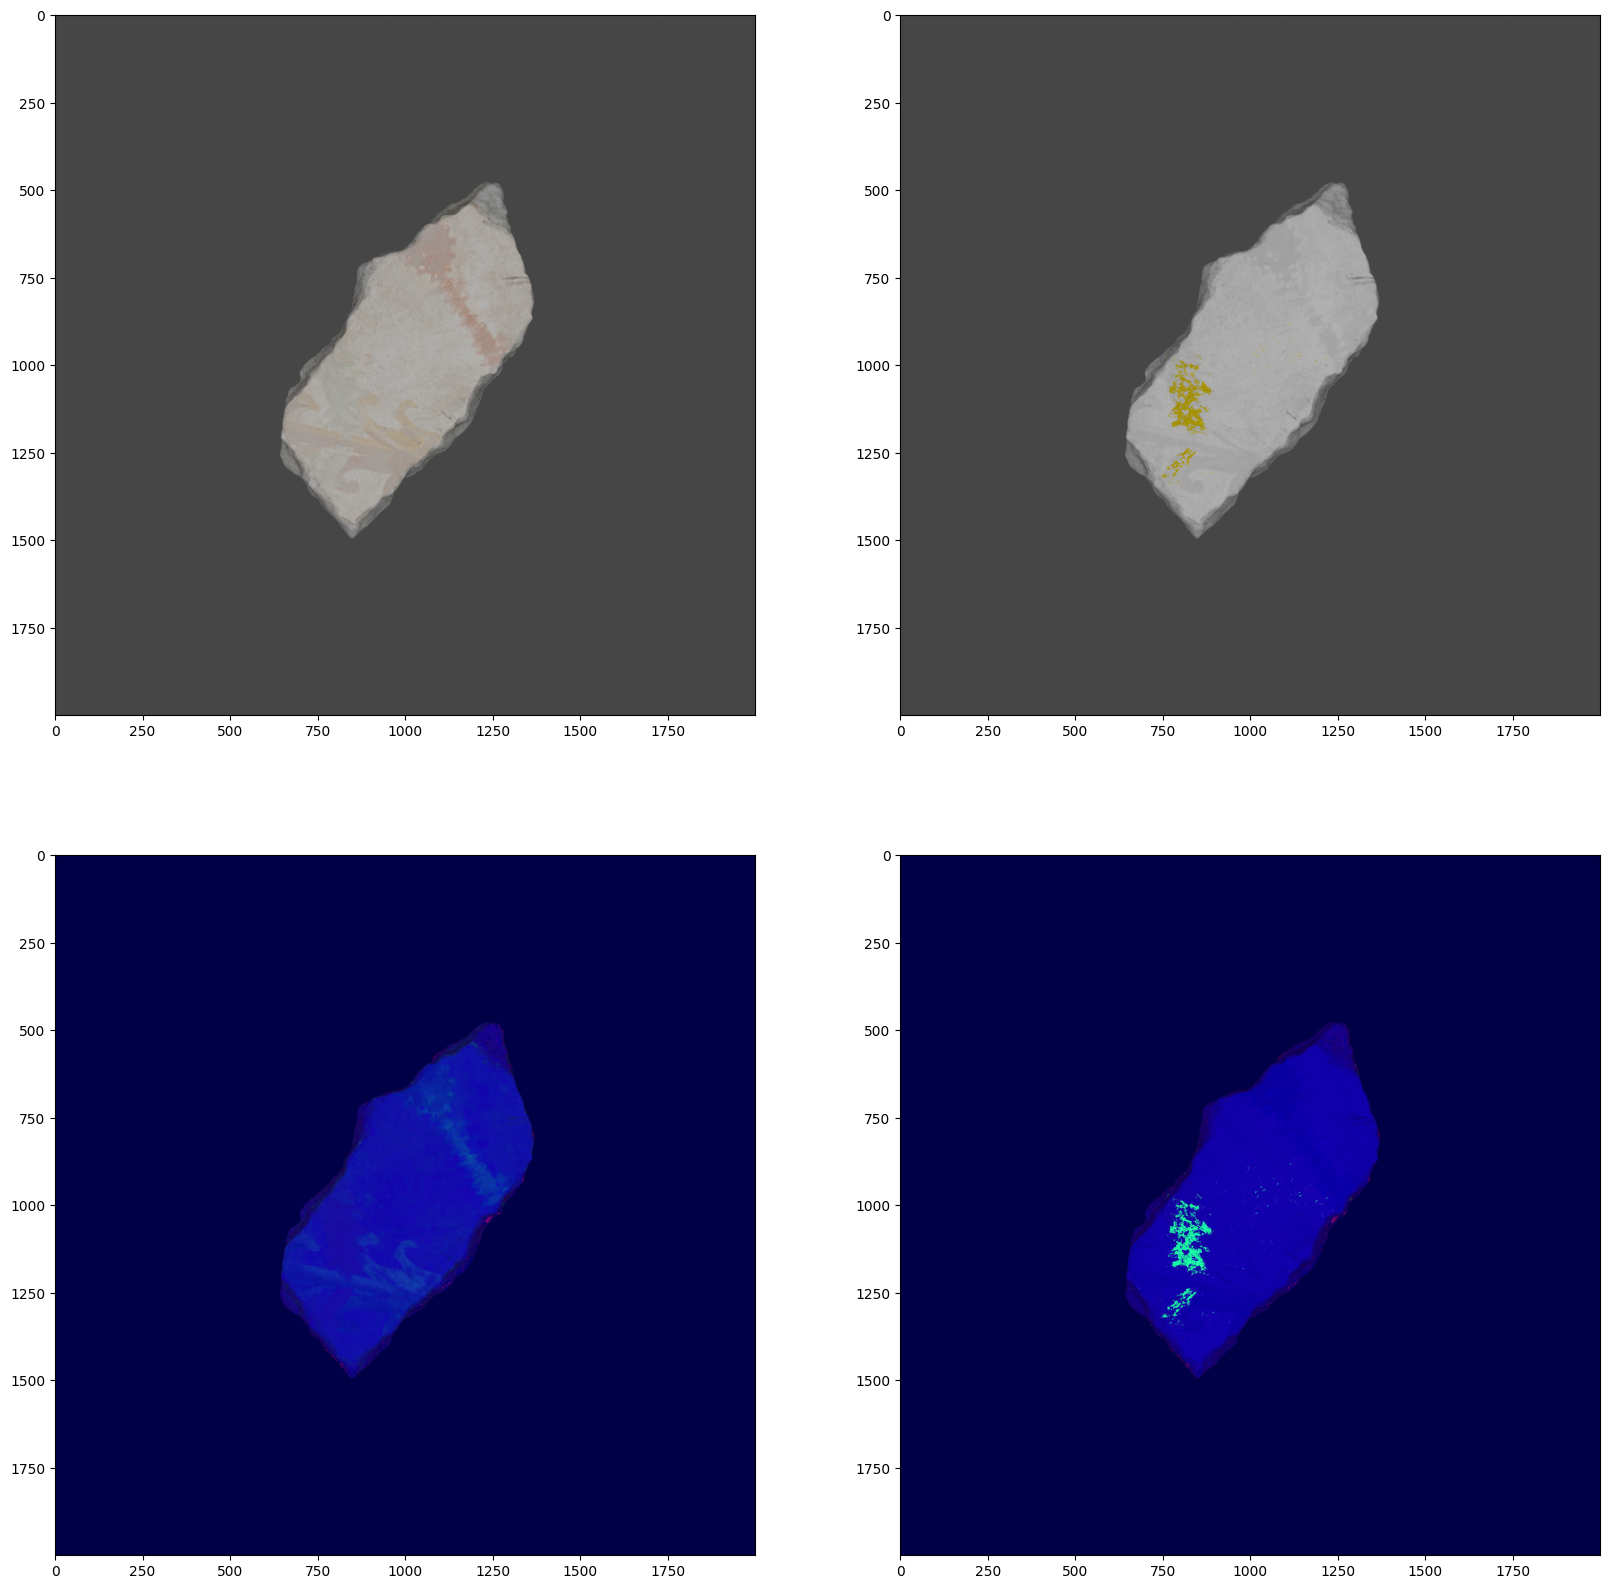

In [42]:
intensed_img_hsv = img_hsv.copy()

greenMask = cv2.inRange(intensed_img_hsv, (26, 10, 30), (97, 100, 255))
intensed_img_hsv[:,:,1] = greenMask 

fig,axes = plt.subplots(2,2,figsize=(20,20))
axes[0,0].imshow(img_rgb)
axes[1,0].imshow(img_hsv)
axes[0,1].imshow(cv2.cvtColor(intensed_img_hsv,cv2.COLOR_HSV2RGB))
axes[1,1].imshow(intensed_img_hsv)

In [35]:
print(greenMask.max())
print(greenMask.shape)

255
(2000, 2000)


In [44]:
def get_pixel_colors(img_rgb):
    pixel_colors = img_rgb.reshape((np.shape(img_rgb)[0] * np.shape(img_rgb)[1], 3))
    norm = colors.Normalize(vmin=-1.0, vmax=1.0)
    norm.autoscale(pixel_colors)
    return norm(pixel_colors).tolist()
    

def plotRGB(img,pixel_colors):
    r, g, b = cv2.split(img)

    fig = plt.figure()
    axis = fig.add_subplot(1, 1, 1, projection="3d")
    

    axis.scatter(
        r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker="."
    )
    axis.set_xlabel("Red")
    axis.set_ylabel("Green")
    axis.set_zlabel("Blue")
    plt.show()

def plotHSV(img,pixel_colors):
    
    h, s, v = cv2.split(img)

    fig = plt.figure()
    axis = fig.add_subplot(1, 1, 1, projection="3d")
    #pixel_colors = pic.reshape((np.shape(pic)[0] * np.shape(pic)[1], 3))
    axis.scatter(
        h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker="."
    )
    axis.set_xlabel("Hue")
    axis.set_ylabel("Saturation")
    axis.set_zlabel("Value")
    plt.show()

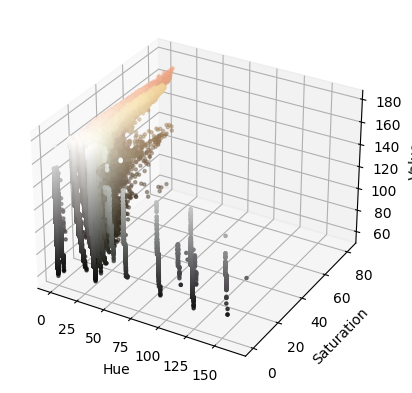

In [45]:
plotHSV(img_hsv,get_pixel_colors(img_rgb))

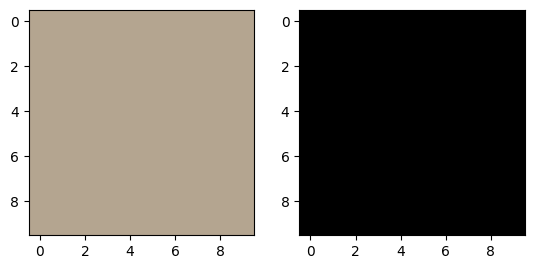

In [105]:
light_orange = (0,20,0) #(26, 10, 30)#(1, 190, 200)
dark_orange = (25,50,180) #(97, 100, 255) #(18, 255, 255)

lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

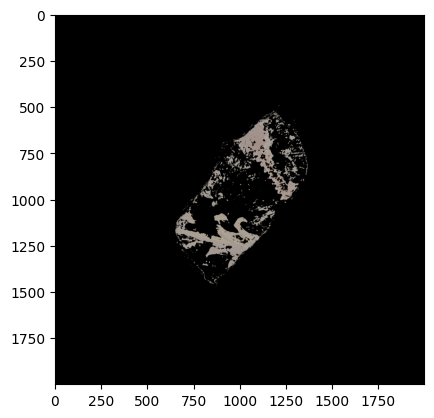

In [106]:
mask = cv2.inRange(img_hsv, light_orange, dark_orange)

result = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)
plt.imshow(result)

#### On black background image, run the histogram

In [110]:
images_paths[0]

'../images/input\\1.jpeg'

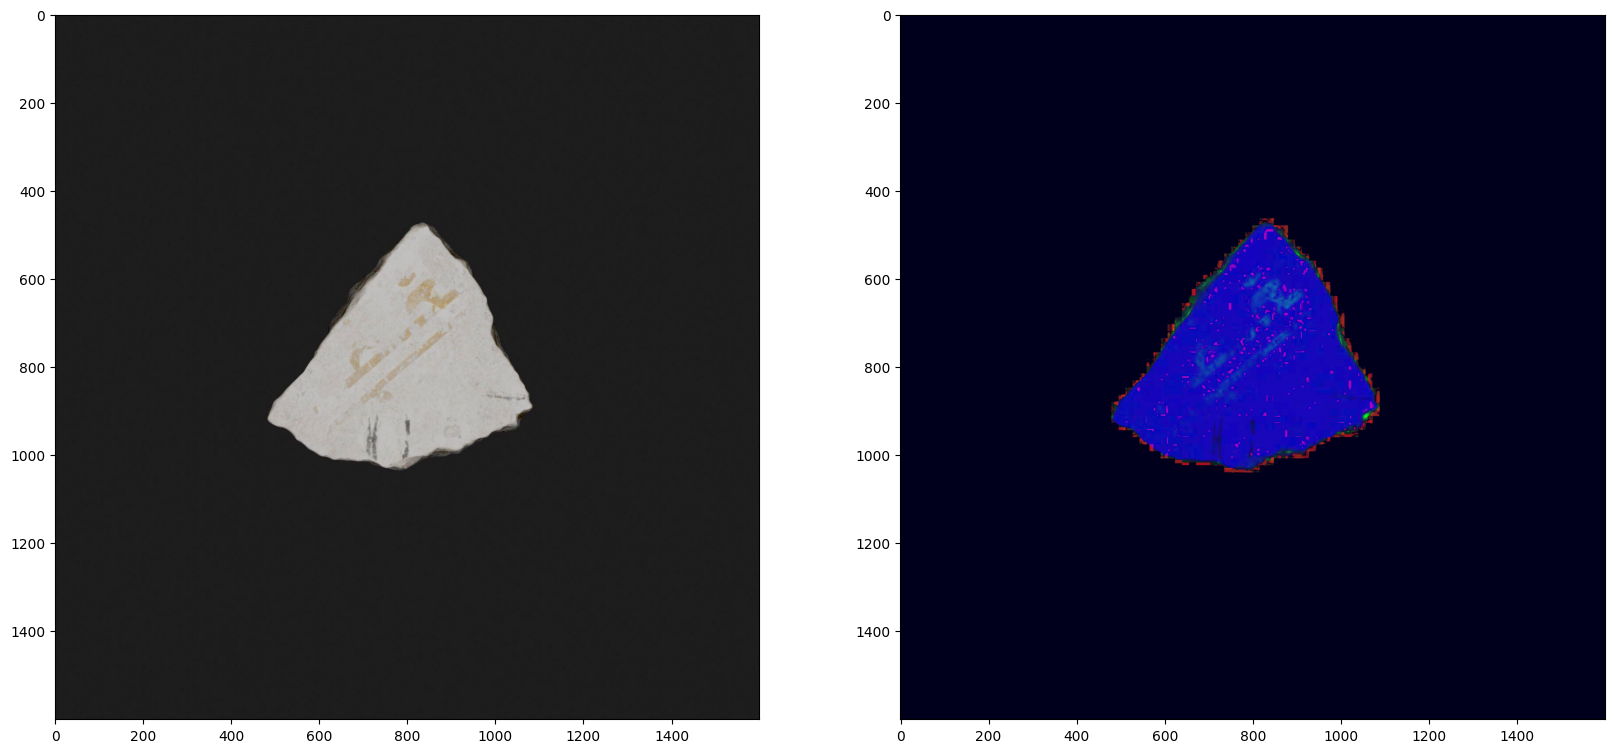

In [114]:
img_2 = cv2.imread(images_paths[0])
img_2_hsv = cv2.cvtColor(img_2,cv2.COLOR_BGR2HSV)
img_2_rgb = cv2.cvtColor(img_2,cv2.COLOR_BGR2RGB)

fig,axes = plt.subplots(1,2,figsize=(20,20))
axes[0].imshow(img_2_rgb)
axes[1].imshow(img_2_hsv)

plt.show()

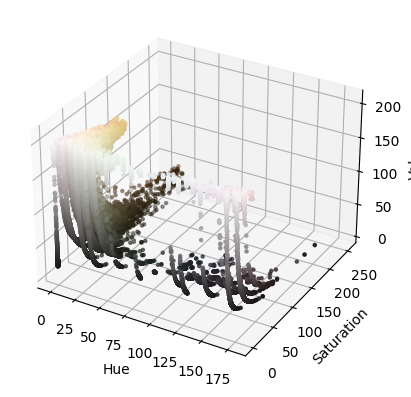

In [115]:
plotHSV(img_2_hsv,get_pixel_colors(img_2_rgb))

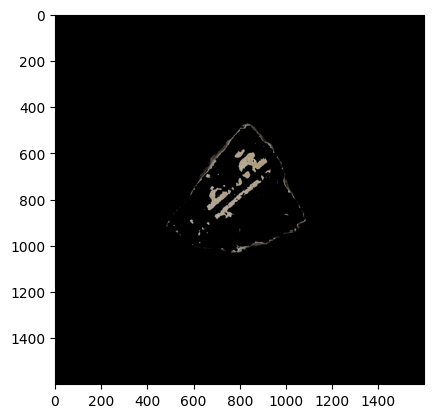

In [125]:
light_orange = (0,20,50) #(26, 10, 30)#(1, 190, 200)
dark_orange = (180,250,200) #(97, 100, 255) #(18, 255, 255)

lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0

# plt.subplot(1, 2, 1)
# plt.imshow(hsv_to_rgb(do_square))
# plt.subplot(1, 2, 2)
# plt.imshow(hsv_to_rgb(lo_square))

mask = cv2.inRange(img_2_hsv, light_orange, dark_orange)

result = cv2.bitwise_and(img_2_rgb, img_2_rgb, mask=mask)
plt.imshow(result)

So, in this case the pepper salt are not dust but rather same color prints!


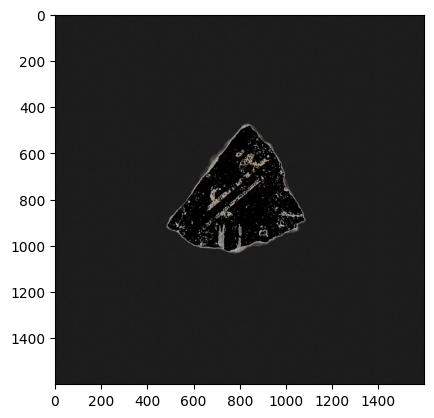

In [135]:
light_orange = (0,0,0) #(26, 10, 30)#(1, 190, 200)
dark_orange = (180,360,180) #(97, 100, 255) #(18, 255, 255)

lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0

# plt.subplot(1, 2, 1)
# plt.imshow(hsv_to_rgb(do_square))
# plt.subplot(1, 2, 2)
# plt.imshow(hsv_to_rgb(lo_square))

mask = cv2.inRange(img_2_hsv, light_orange, dark_orange)

result = cv2.bitwise_and(img_2_rgb, img_2_rgb, mask=mask)
plt.imshow(result)
print("So, in this case the pepper salt are not dust but rather same color prints!")

##### Next Try is to see in here we can extract the pictorial data also. This fragment painting is "more intuitive"...

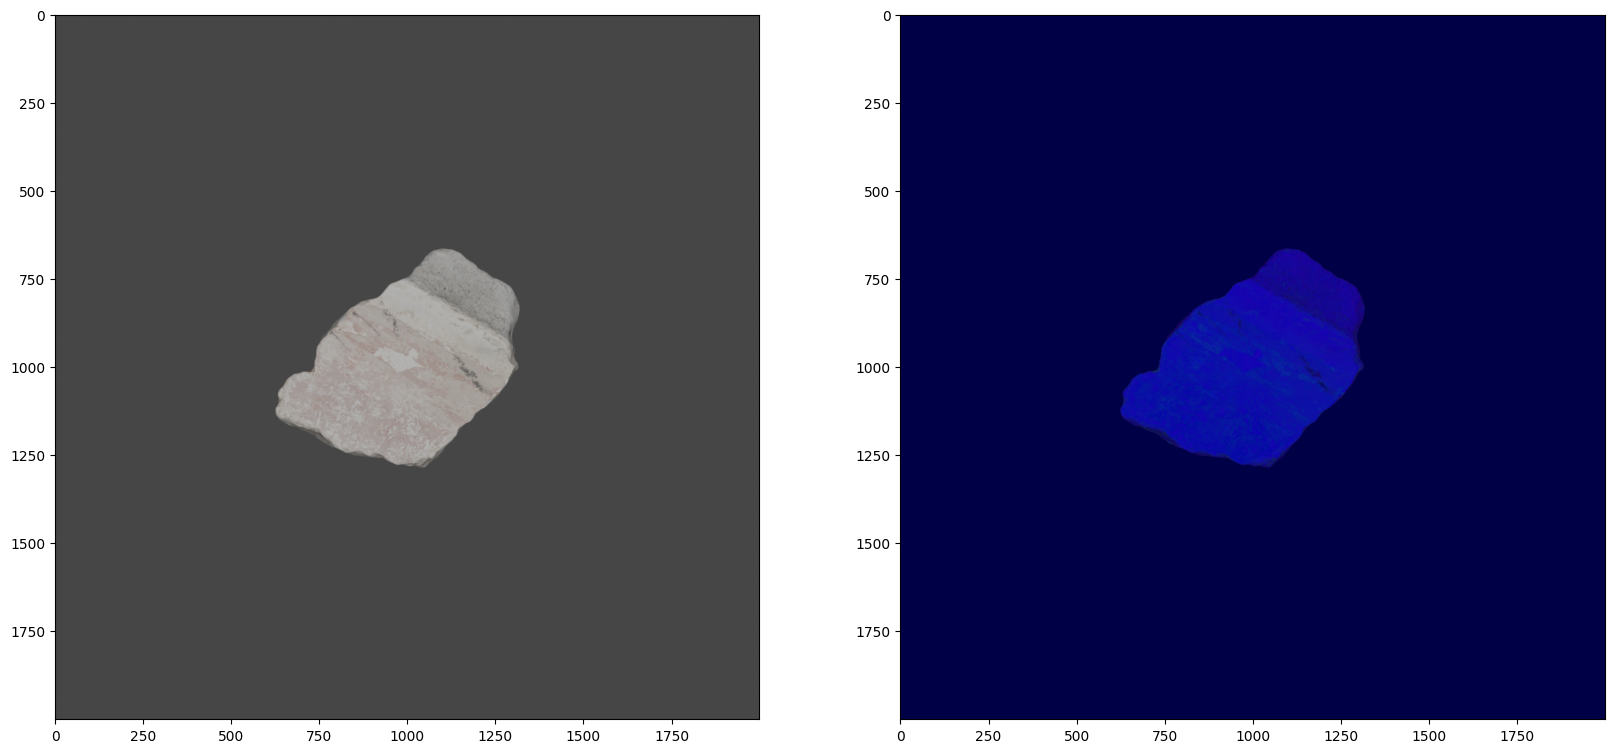

In [136]:
img_2 = cv2.imread(images_paths[8])
img_2_hsv = cv2.cvtColor(img_2,cv2.COLOR_BGR2HSV)
img_2_rgb = cv2.cvtColor(img_2,cv2.COLOR_BGR2RGB)

fig,axes = plt.subplots(1,2,figsize=(20,20))
axes[0].imshow(img_2_rgb)
axes[1].imshow(img_2_hsv)

plt.show()

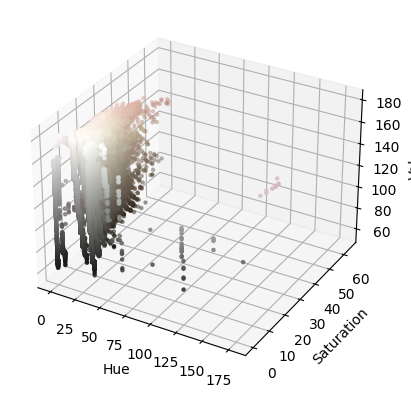

In [137]:
plotHSV(img_2_hsv,get_pixel_colors(img_2_rgb))

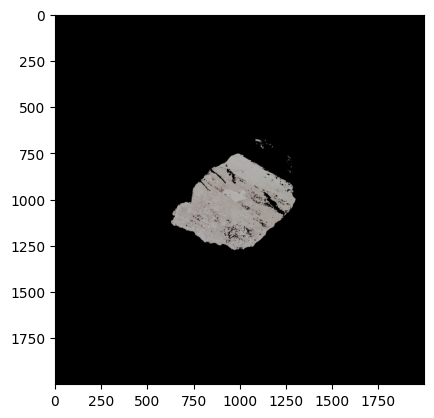

In [143]:
light_orange = (0,0,160) #(26, 10, 30)#(1, 190, 200)
dark_orange = (180,250,180) #(97, 100, 255) #(18, 255, 255)

lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0

# plt.subplot(1, 2, 1)
# plt.imshow(hsv_to_rgb(do_square))
# plt.subplot(1, 2, 2)
# plt.imshow(hsv_to_rgb(lo_square))

mask = cv2.inRange(img_2_hsv, light_orange, dark_orange)

result = cv2.bitwise_and(img_2_rgb, img_2_rgb, mask=mask)
plt.imshow(result)

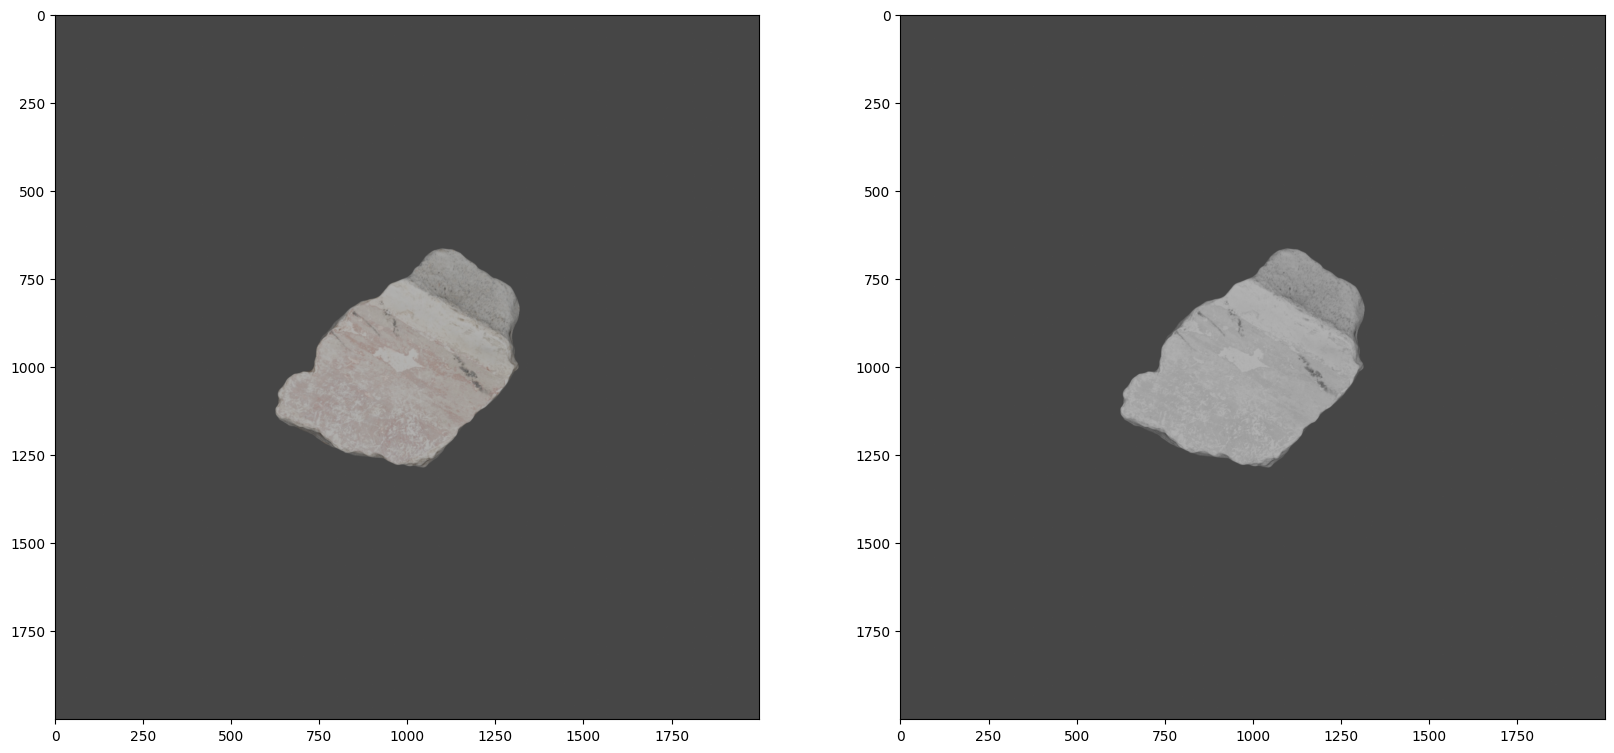

In [151]:

print("make it work")

intensed_img_hsv = img_2_hsv.copy()

pinkMask = cv2.inRange(intensed_img_hsv, (322,89,78),(350, 24, 100))
intensed_img_hsv[:,:,1] = pinkMask 
# purpleMask = cv2.inRange(intensed_img_hsv, (240,8,98) ,(274,100,50))
# intensed_img_hsv[:,:,1] = purpleMask 

fig,axes = plt.subplots(1,2,figsize=(20,20))
axes[0].imshow(img_2_rgb)
axes[1].imshow(cv2.cvtColor(intensed_img_hsv,cv2.COLOR_HSV2RGB))

In [150]:
pinkMask.max()

0

##### Trying to extract the contour of the whole fragment

In [ ]:
# Run maybe PCA on the hsv? making it 2d